# Prediction of Test Dataset

In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import model
import data_loader
import loss
import tester

In [15]:
# root_path = 'D://Data/massachusetts-roads-dataset/'
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select2_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [16]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs


In [17]:
net = model.DLinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'dlinknet34_lr_test_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.51,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in dlinknet34_lr_test_epoch20.pth is ready 
(threshold = 0.51, 784 pairs in test dataset)


In [5]:
# show img & label * prediction
# tt.test_one(img, lbl, show = True, combine = False, verbose = False, save_name = None);
# show img combined with prediction (overlay)
# tt.test_one(img, lbl, show = True, combine = True, verbose = False, save_name = None);

In [13]:
# tt.get_threshold_best()

## Predict One Image

In [33]:
img, lbl = next(iter(tt.test_loader))

In [46]:
# sorted(tt.net(img.cuda()).cpu().flatten().detach().numpy())

## Good & Bad Prediction Examples

In [7]:
tt.test_score()

100%|██████████| 784/784 [02:06<00:00,  6.20it/s]


In [27]:
import os
from tqdm import tqdm
import cv2
from utils import *

subfolder = 'test_result/'
if not os.path.exists(tt.save_path + subfolder):
    os.makedirs(tt.save_path + subfolder)
    print("Build folder of {}".format(tt.save_path + subfolder))
for i, pred in enumerate(tqdm(tt.pred_list)):
    each_file_name = tt.test_dataset.data_list[i].split("/")[-1].split(".")[0] + '.png'
    full_file_path = tt.save_path + subfolder + each_file_name
    cv2.imwrite(full_file_path, change_tensor_to_plot(pred)*255)

100%|██████████| 784/784 [00:01<00:00, 600.29it/s]


In [8]:
len(tt.pred_list)

784

In [9]:
print(np.where(tt.dice_score >= np.quantile(tt.dice_score, 0.95)), '\n',
     np.where(tt.iou_score >= np.quantile(tt.iou_score, 0.95)))

(array([  3,  11,  34,  37,  38,  44,  48,  56,  58,  64,  72,  78,  79,
        80,  88,  99, 107, 202, 203, 217, 228, 248, 252, 264, 265, 300,
       301, 332, 514, 535, 537, 540, 566, 604, 609, 630, 665, 669, 760,
       763]),) 
 (array([  3,  11,  34,  37,  38,  44,  48,  56,  58,  64,  72,  78,  79,
        80,  88,  99, 107, 202, 203, 217, 228, 248, 252, 264, 265, 300,
       301, 332, 514, 535, 537, 540, 566, 604, 609, 630, 665, 669, 760,
       763]),)


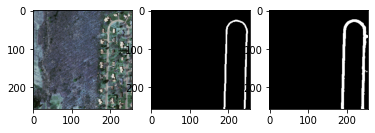

In [10]:
# good prediction
tt.show_idx(78, combine = False)

In [11]:
print(np.where(tt.dice_score == np.min(tt.dice_score)), '\n', np.where(tt.iou_score == np.min(tt.iou_score)))

(array([  6,   7,  31,  41,  67,  75,  95,  96,  97, 106, 109, 110, 113,
       114, 117, 118, 119, 122, 129, 130, 131, 133, 134, 135, 139, 140,
       143, 145, 149, 159, 178, 179, 182, 183, 184, 188, 189, 190, 218,
       224, 227, 235, 238, 239, 244, 245, 260, 261, 281, 282, 291, 311,
       314, 317, 318, 319, 359, 360, 364, 365, 373, 380, 406, 407, 501,
       505, 509, 511, 516, 517, 521, 522, 526, 527, 554, 558, 559, 562,
       563, 589, 591, 640, 641, 659, 701, 710, 713, 729, 746, 755, 778,
       779, 781, 782, 783]),) 
 (array([  6,   7,  31,  41,  67,  75,  95,  96,  97, 106, 109, 110, 113,
       114, 117, 118, 119, 122, 129, 130, 131, 133, 134, 135, 139, 140,
       143, 145, 149, 159, 178, 179, 182, 183, 184, 188, 189, 190, 218,
       224, 227, 235, 238, 239, 244, 245, 260, 261, 281, 282, 291, 311,
       314, 317, 318, 319, 359, 360, 364, 365, 373, 380, 406, 407, 501,
       505, 509, 511, 516, 517, 521, 522, 526, 527, 554, 558, 559, 562,
       563, 589, 591, 640, 641

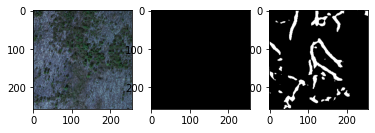

In [12]:
tt.show_idx(6, combine = False)

## Comparison among models

In [34]:
from utils import *
tmp = change_tensor_to_plot(tt.pred_list[0])

In [45]:
import cv2
cv2.imwrite('/home/renyan/road-extraction/111.png', tmp*255)

True

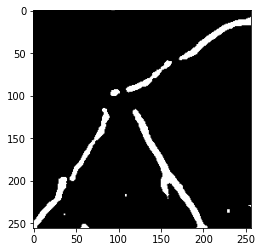

In [37]:
plt.imshow(tmp)